In [ ]:
from faker import Faker

import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import pickle

In [112]:
!pip install scikit-learn==0.24.2


     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     --------------- ------------------------ 2.9/7.5 MB 15.2 MB/s eta 0:00:01
     ------------------------------ --------- 5.8/7.5 MB 14.7 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      Traceback (most recent call last):
        File "c:\Users\sandh\OneDrive\Des

In [244]:
fake=Faker()

In [653]:
from faker import Faker
import random
import numpy as np
import pandas as pd  # Ensure pandas is imported

fake = Faker()

loan_type = ["Personal", "Business", "Education", "Auto", "Mortgage"]

product_names = [
    'Savings Account', 'Checking Account', 'Credit Card', 'Personal Loan', 'Home Loan',
    'Auto Loan', 'Business Loan', 'Student Loan', 'Investment Fund', 'Retirement Plan',
    'Insurance Policy', 'Mutual Fund', 'Bond', 'Certificate of Deposit', 'Home Equity Line',
    'Mortgage Refinance', 'Business Credit Line', 'Auto Refinance', 'Home Improvement Loan',
    'Gold Loan', 'Cash Credit', 'Short-Term Loan', 'Long-Term Loan', 'Travel Loan',
    'Medical Loan', 'Emergency Loan', 'Holiday Loan', 'Debt Consolidation Loan', 'Small Business Loan',
    'Agricultural Loan', 'Technology Loan', 'Education Savings Plan', 'Wealth Management',
    'Stock Investment', 'Real Estate Investment', 'International Investment', 'Fixed Deposit',
    'Recurring Deposit', 'Loan Against Property', 'Gold Investment', 'Retirement Savings',
    'High-Yield Savings Account', 'Money Market Account', 'Insurance Savings', 'Pension Plan',
    'Child Education Fund', 'Healthcare Savings', 'Property Investment', 'Auto Insurance'
]



trans_type = ["Withdrawal", "Deposit"]
interaction_type = ["purchased", "viewed", "clicked"]


# Number of customers to generate
num_customers = 1000

# Lists to hold generated data
customer_data = []


# Define loan amount calculation based on credit score and income
def calculate_loan_amount(credit_score, income):
    if credit_score >= 750:
        if income < 40000:
            loan_amount = random.randint(100000, 150000)
        elif income < 100000:
            loan_amount = random.randint(200000, 350000)
        else:
            loan_amount = random.randint(350000, 500000)
    elif credit_score >= 650:
        if income < 40000:
            loan_amount = random.randint(50000, 75000)
        elif income < 100000:
            loan_amount = random.randint(150000, 200000)
        else:
            loan_amount = random.randint(275000, 350000)
    elif credit_score >= 550:
        if income < 40000:
            loan_amount = random.randint(25000, 40000)
        elif income < 100000:
            loan_amount = random.randint(100000, 150000)
        else:
            loan_amount = random.randint(200000, 275000)
    else:
        if income < 40000:
            loan_amount = random.randint(10000, 20000)
        elif income < 100000:
            loan_amount = random.randint(70000, 100000)
        else:
            loan_amount = random.randint(100000, 150000)
    return loan_amount

customer_ids=[f"C0{i+1}" for i in range(200)]
prod_ids=[f"P0{i+1}" for i in range(50)]

# Create a mapping between product_id and product_name
product_id_to_name = {f"P{i+1:03d}": product for i, product in enumerate(product_names)}

# Define synthetic data generation
for i in range(1, num_customers + 1):
    customer_id = random.choice(customer_ids)  # Customer ID in the format C001, C002, ...
    age = random.randint(18, 75)  # Age between 18 and 75
    genders = ["Male", "Female", "Others"]
    g_weights = [0.5, 0.4, 0.05] 
    gender= random.choices(genders, weights=g_weights, k=1)[0]
    income = random.randint(15000, 200000)  # Annual income between 15,000 and 200,000
    credit_score = random.randint(300, 850)  # Credit score between 300 and 850
    loan_amount = calculate_loan_amount(credit_score, income)  # Loan amount based on credit score and income
    interest_rate = round(random.uniform(1.5, 12.5), 2)  # Interest rate between 1.5% and 12.5%
    loan_term = random.choice([12, 24, 36, 48, 60])  # Loan term in months (1 to 5 years)
    interaction_type = random.choice(["purchased", "viewed", "clicked"]) 
    trans_ty_weights = [0.40,0.6] 
    tr_type= random.choices(trans_type, weights=trans_ty_weights, k=1)[0]
    transaction_type=random.choice(tr_type)

    # Default probability and repayment status logic
    default_probability = (700 - credit_score) / 400 + (50000 - income) / 100000
    default_probability = min(max(default_probability, 0.05), 0.95)
    repayment_status = np.random.binomial(1, default_probability)

    transaction_frequency = random.randint(1, 10)

    if credit_score < 580:
        CIBIL_score_categories = "Poor"
    elif credit_score < 670:
        CIBIL_score_categories = "Fair"
    elif credit_score < 740:
        CIBIL_score_categories = "Good"
    else:
        CIBIL_score_categories = "Excellent"

    # Derived new field
    Debt_Income = loan_amount / income

    # Randomly select a product ID and its corresponding name
    product_id, product_name = random.choice(list(product_id_to_name.items()))

    # Generate transaction data
    transaction_data = fake.date_between("-2y", "now")
    
    transaction_data=pd.to_datetime(transaction_data)
    transaction_years = transaction_data.year
    transaction_month=transaction_data.month




    # Interaction data
    inter_date = fake.date_between("-2y", "now")
    inter_date=pd.to_datetime(inter_date)
    interaction_year = inter_date.year
    inter_month = inter_date.month

    
    

    # Additional details
    trans_id = fake.uuid4()
    transaction_amt = round(random.randint(50, 5000), 2)
    transaction_type = random.choice(trans_type)

    # Add all generated data for a customer to the list
    customer_data.append({
        "Customer_id": customer_id,
        "Age": age,
        "Gender": gender,
        "Income": income,
        "Credit_score": credit_score,
        "Credit_score_category": CIBIL_score_categories,
        "Loan_amount": loan_amount,
        "Interest_rate": interest_rate,
        "Loan_term": loan_term,
        "Loan_type": random.choice(loan_type),
        "Repayment_status": repayment_status,
        "Debit_income": Debt_Income,
        "Transaction_id": trans_id,
        "Transaction_amt": transaction_amt,
        "Transaction_type":transaction_type,
        "Transaction_data": transaction_data,
        "Transaction_month": transaction_month,
        "Transaction_year": transaction_years,
        "Transaction_freq": transaction_frequency,
        "Product_id": product_id,
        "Product_names": product_name,
        "Interaction_type": interaction_type,
        "Interaction_date": inter_date,
        "Interaction_month": inter_month,
        "Interaction_year":  interaction_year

    })

# Create DataFrame from customer data
load_data = pd.DataFrame(customer_data)

# Sample of generated data (for preview)
print(load_data.head())


  Customer_id  Age  Gender  Income  Credit_score Credit_score_category  \
0       C0124   66    Male  108296           627                  Fair   
1       C0119   25    Male   88437           589                  Fair   
2        C044   21    Male   93447           832             Excellent   
3       C0148   55    Male  138441           845             Excellent   
4       C0196   22  Female  184615           606                  Fair   

   Loan_amount  Interest_rate  Loan_term  Loan_type  ...  Transaction_data  \
0       225098           1.82         12  Education  ...        2024-07-30   
1       109731          10.80         60       Auto  ...        2023-06-17   
2       261695          12.24         48       Auto  ...        2024-11-28   
3       368030           5.67         48       Auto  ...        2023-11-07   
4       257577           5.96         12   Business  ...        2024-11-28   

   Transaction_month Transaction_year  Transaction_freq Product_id  \
0               

In [2]:
df = pd.DataFrame(load_data)

NameError: name 'pd' is not defined

In [4]:
load_data.to_csv("loan_data.csv",index=False)

NameError: name 'load_data' is not defined

In [7]:
df=pd.read_csv("loan_data.csv")

In [8]:
df["Debit_income"]


0      2.078544
1      1.240782
2      2.800464
3      2.658389
4      1.395212
         ...   
995    3.042016
996    0.873793
997    0.744552
998    2.653055
999    0.405464
Name: Debit_income, Length: 1000, dtype: float64

In [9]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Income', 'Credit_score',
       'Credit_score_category', 'Loan_amount', 'Interest_rate', 'Loan_term',
       'Loan_type', 'Repayment_status', 'Debit_income', 'Transaction_id',
       'Transaction_amt', 'Transaction_type', 'Transaction_data',
       'Transaction_month', 'Transaction_year', 'Transaction_freq',
       'Product_id', 'Product_names', 'Interaction_type', 'Interaction_date',
       'Interaction_month', 'Interaction_year'],
      dtype='object')

DATA PREPROCESSING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Income                 1000 non-null   int64  
 4   Credit_score           1000 non-null   int64  
 5   Credit_score_category  1000 non-null   object 
 6   Loan_amount            1000 non-null   int64  
 7   Interest_rate          1000 non-null   float64
 8   Loan_term              1000 non-null   int64  
 9   Loan_type              1000 non-null   object 
 10  Repayment_status       1000 non-null   int64  
 11  Debit_income           1000 non-null   float64
 12  Transaction_id         1000 non-null   object 
 13  Transaction_amt        1000 non-null   int64  
 14  Transaction_type       1000 non-null   object 
 15  Trans

In [11]:
df.isnull().sum()


Customer_id              0
Age                      0
Gender                   0
Income                   0
Credit_score             0
Credit_score_category    0
Loan_amount              0
Interest_rate            0
Loan_term                0
Loan_type                0
Repayment_status         0
Debit_income             0
Transaction_id           0
Transaction_amt          0
Transaction_type         0
Transaction_data         0
Transaction_month        0
Transaction_year         0
Transaction_freq         0
Product_id               0
Product_names            0
Interaction_type         0
Interaction_date         0
Interaction_month        0
Interaction_year         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Mapping for 'loan_term' column
loan_term_mapping = {12:1, 24:2, 36:3, 48:4, 60:5}

# Apply the mapping to the 'loan_term' column
df['Loan_term'] = df['Loan_term'].map(loan_term_mapping)

In [14]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Income', 'Credit_score',
       'Credit_score_category', 'Loan_amount', 'Interest_rate', 'Loan_term',
       'Loan_type', 'Repayment_status', 'Debit_income', 'Transaction_id',
       'Transaction_amt', 'Transaction_type', 'Transaction_data',
       'Transaction_month', 'Transaction_year', 'Transaction_freq',
       'Product_id', 'Product_names', 'Interaction_type', 'Interaction_date',
       'Interaction_month', 'Interaction_year'],
      dtype='object')

EXPLORATORY DATA ANALYSIS


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
#categorical data analysis

In [17]:
#credit card score

df["Credit_score_category"].value_counts()

Credit_score_category
Poor         527
Excellent    190
Fair         167
Good         116
Name: count, dtype: int64

<Axes: title={'center': 'CIBIL_score_categories Distribution'}>

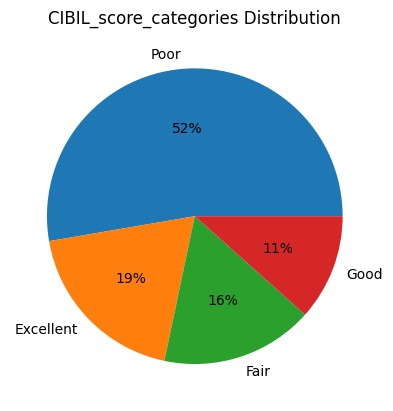

In [18]:
df["Credit_score_category"].value_counts().plot.pie(ylabel="",title="CIBIL_score_categories Distribution",autopct=lambda p :f"{int(p)}%")

In [19]:

df["Loan_type"].value_counts()

Loan_type
Auto         212
Education    204
Business     198
Personal     196
Mortgage     190
Name: count, dtype: int64

<Axes: title={'center': 'Loan Type Distribution'}>

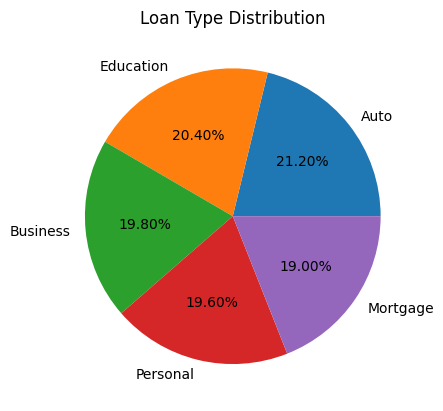

In [20]:
df["Loan_type"].value_counts().plot.pie(autopct="%.2f%%",ylabel="",title="Loan Type Distribution")

In [21]:
categorical_col=df.select_dtypes(include=["object","category"])

In [22]:
df["Transaction_year"].value_counts()

Transaction_year
2024    505
2023    483
2022     12
Name: count, dtype: int64

In [23]:
categorical_col.columns

Index(['Customer_id', 'Gender', 'Credit_score_category', 'Loan_type',
       'Transaction_id', 'Transaction_type', 'Transaction_data', 'Product_id',
       'Product_names', 'Interaction_type', 'Interaction_date'],
      dtype='object')

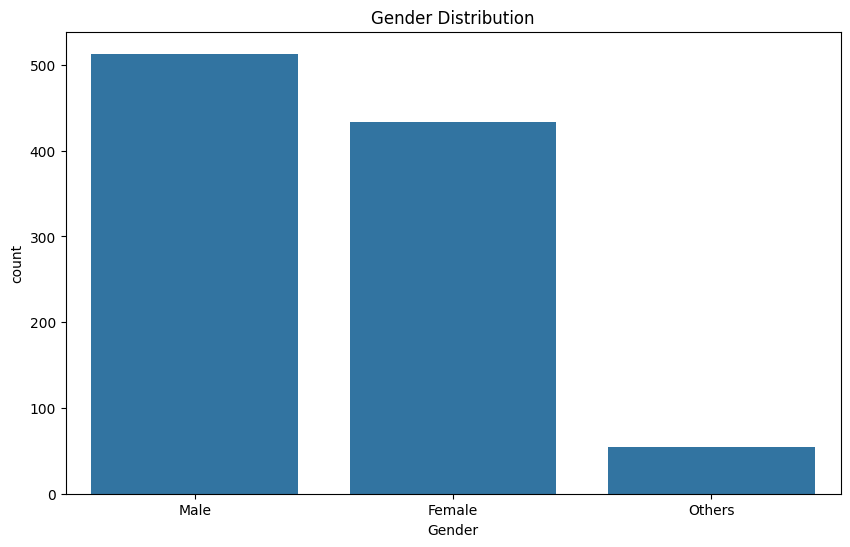

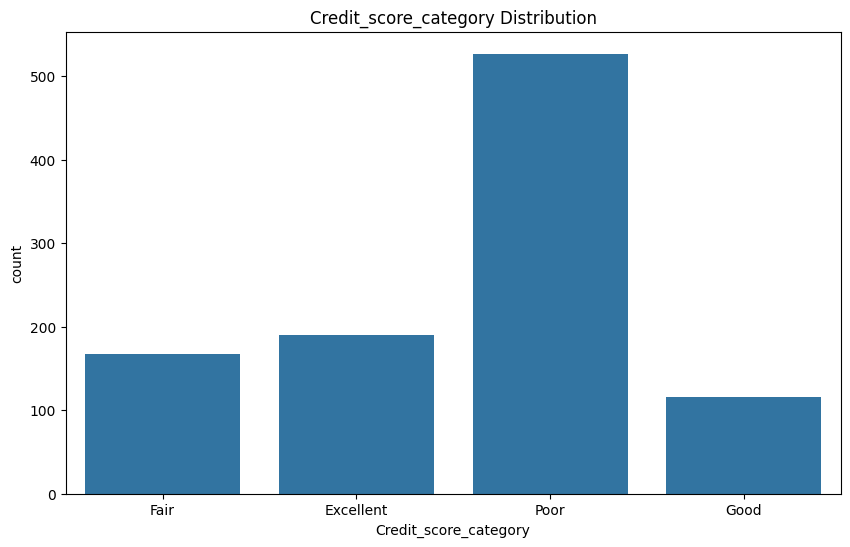

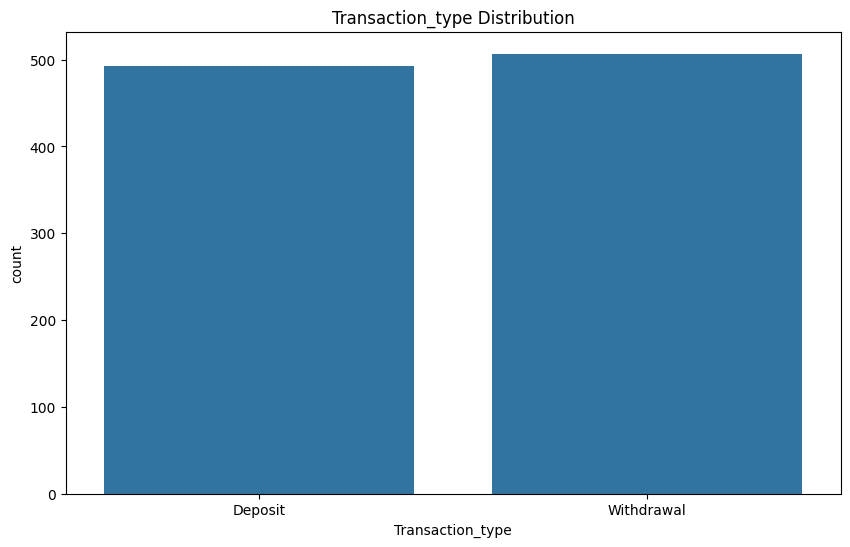

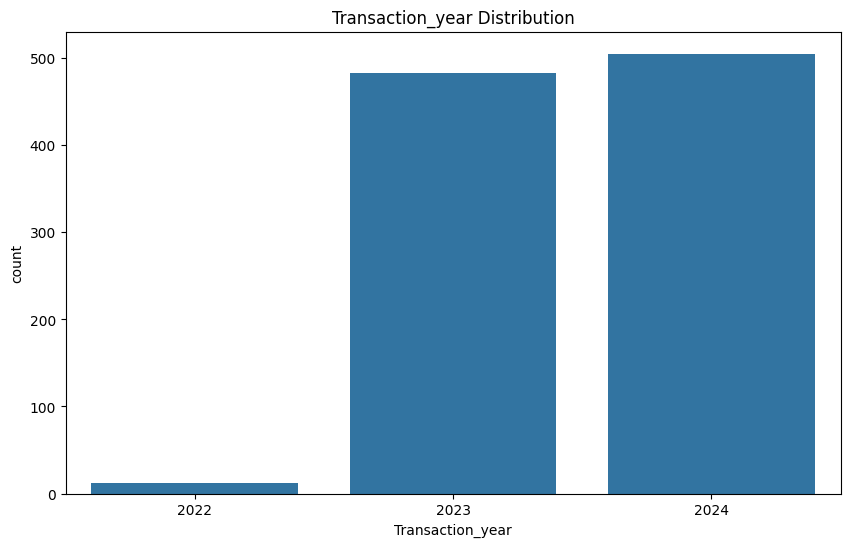

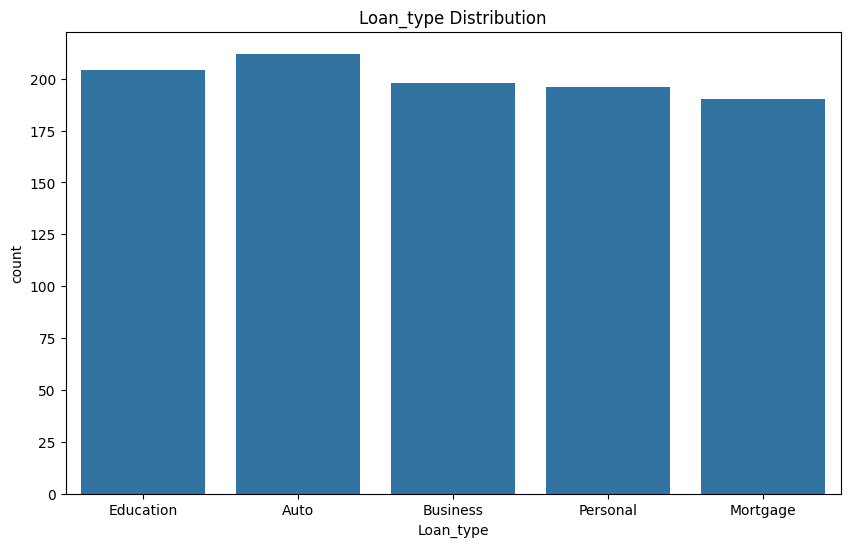

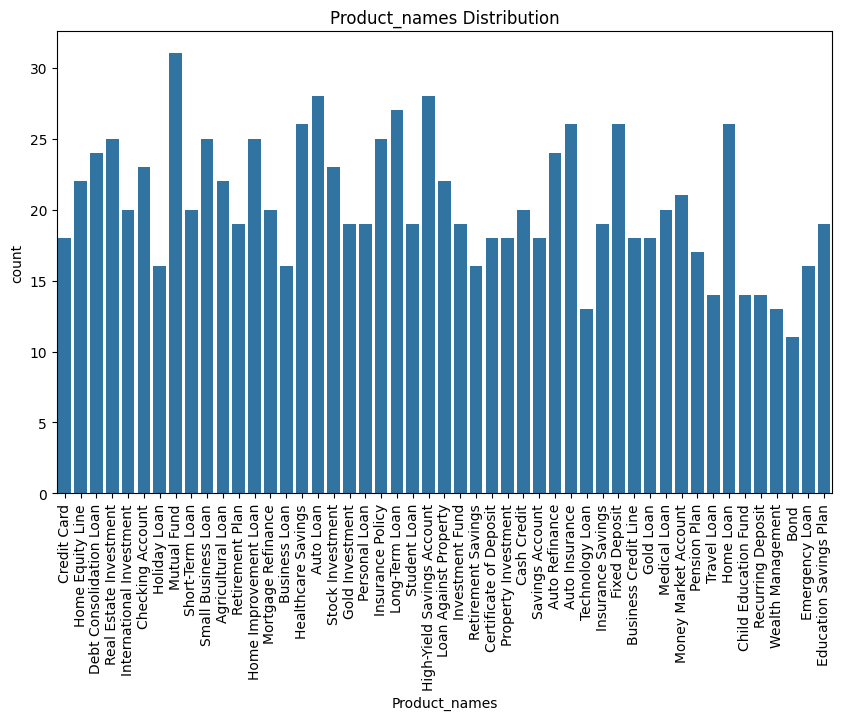

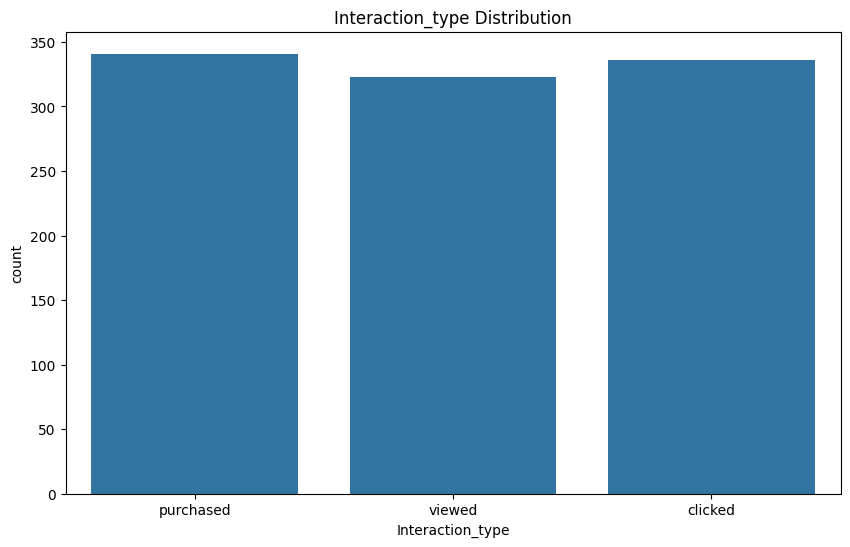

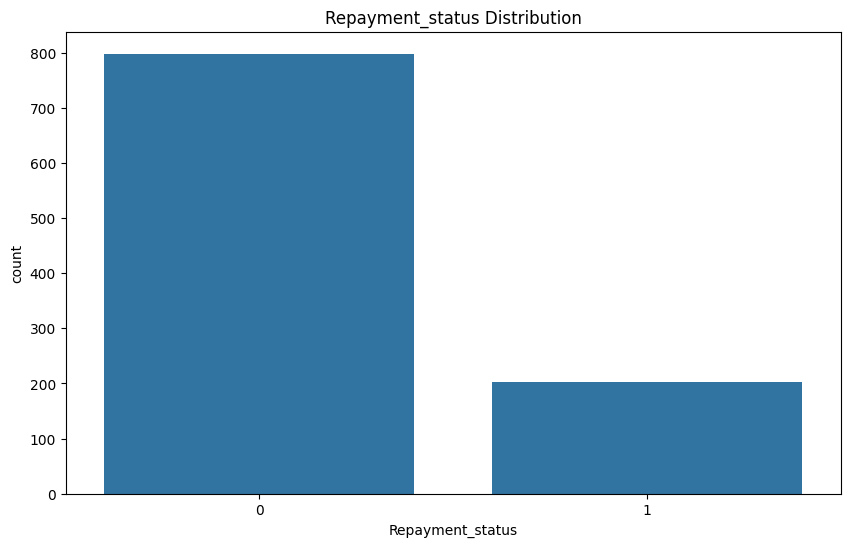

In [24]:


cat_col = ['Gender', 'Credit_score_category',"Transaction_type" ,"Transaction_year",'Loan_type', 'Product_names', 'Interaction_type',"Repayment_status"]

for column in cat_col:
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=column, data=df)
    
    # Add title
    plt.title(f"{column} Distribution")
    
    # Rotate x-axis labels if the column is 'Product_names'
    if column == "Product_names":
        plt.xticks(rotation=90)
    
    plt.show()



Insights from above Countplots:
1.Gender Distribution: Compared to Female more males are taken loans.
1.Credit score Grades: More Customers having poor credit scores.
3.Transaction Type   :Most of transactions were Widthdrawl and Deposit bit low.
4.Transaction Year   : from Dec 2022 -Dec 2023 Transaction low compared with 2024 till December
5.Loan Type          : Customer were taken more loans on auto and other loans like Education, Mortgage, Personal,
                       Business were more or less equally distributed
6.Produts:             Mutual funds , Auto loan , savings account, Fixed Deposit, home loan were involed more in product.
7.Interaction Type   :compared to viwed and clicked count for purchased bit high.
8.Repayment statua   : Count of customers who repaied the loan is higher in number.

Text(0.5, 1.0, 'Gender vs Cibil Grade')

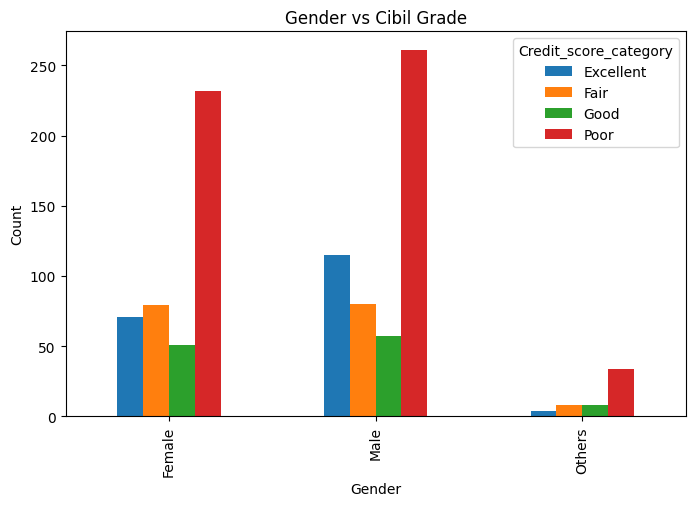

In [25]:
#cross analysis:
pd.crosstab(df['Gender'], df['Credit_score_category']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Cibil Grade")

Gender Vs Cibil grade gives out the result where poor grade is more or less equally distributed. where Excellent, good and fair grade was more in male than other two genders

Text(0.5, 1.0, 'Gender vs Loan Type')

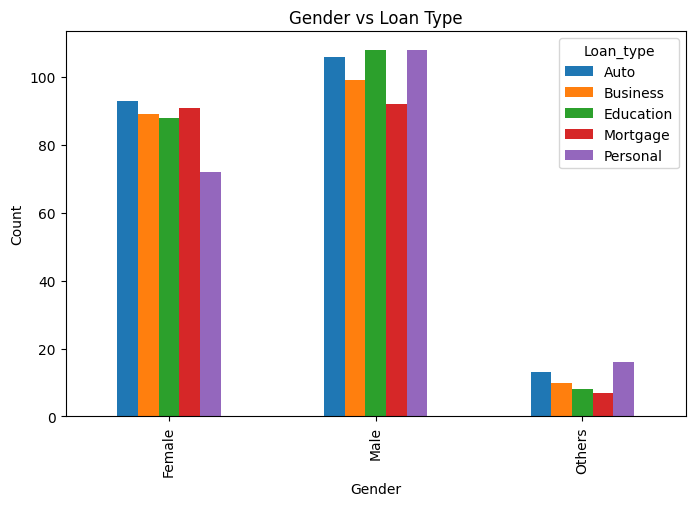

In [26]:
pd.crosstab(df['Gender'], df['Loan_type']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Loan Type")

Depends on the gender loan type vary can be seen, 
Female taken more loans in Auto, Mortgage comapared with other.
Male take more loans in Auto, Education, Personal comapared with other.
Transgender taken more personal loan.




Text(0.5, 1.0, 'Loan_type vs Cibil Grade')

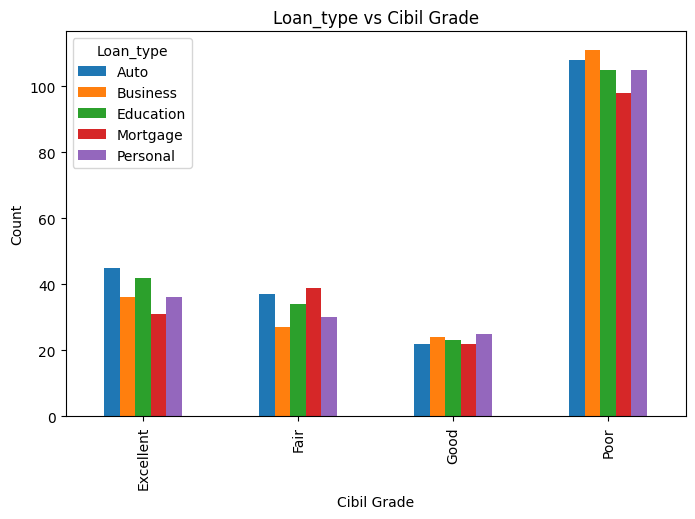

In [27]:
pd.crosstab(df['Credit_score_category'], df['Loan_type']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Cibil Grade")
plt.ylabel("Count")
plt.title("Loan_type vs Cibil Grade")

From the above graph, we can clearly see that poor cibil grade due to customers taken more loan for business comparatively with other loans.

Text(0.5, 1.0, 'Repayment_status vs Gender')

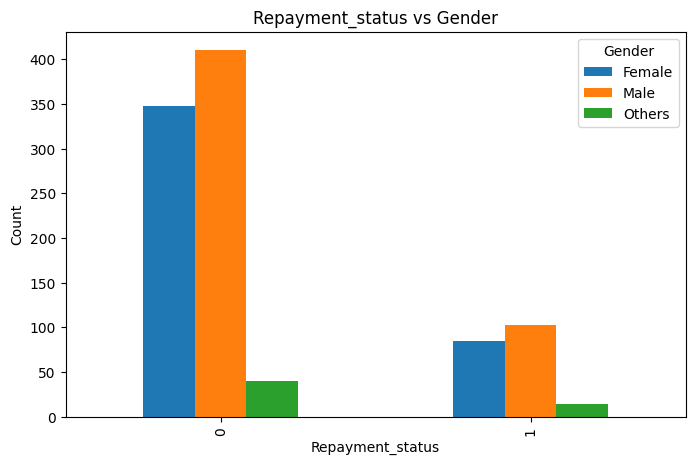

In [28]:
pd.crosstab(df['Repayment_status'], df['Gender']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Repayment_status")
plt.ylabel("Count")
plt.title("Repayment_status vs Gender")

Above plot shows that Loan repaied by the Male more than other two genders.

In [29]:
# Define age bins
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']

# Create age groups
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Display the counts for each age group
print(df['Age_group'].value_counts())


Age_group
26-35    183
46-55    182
36-45    174
66-75    172
56-65    152
18-25    124
Name: count, dtype: int64


Text(0.5, 1.0, 'Repayment_status vs Age_group')

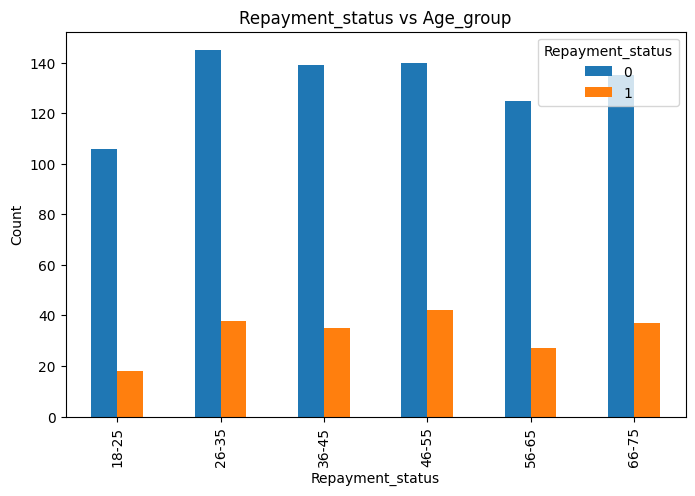

In [30]:
pd.crosstab(df['Age_group'], df['Repayment_status']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Repayment_status")
plt.ylabel("Count")
plt.title("Repayment_status vs Age_group")

Default Repayment Stauts is more in the Age range between 26-35 and less in 18-25


Text(0.5, 1.0, 'Age_group vs Loan_type')

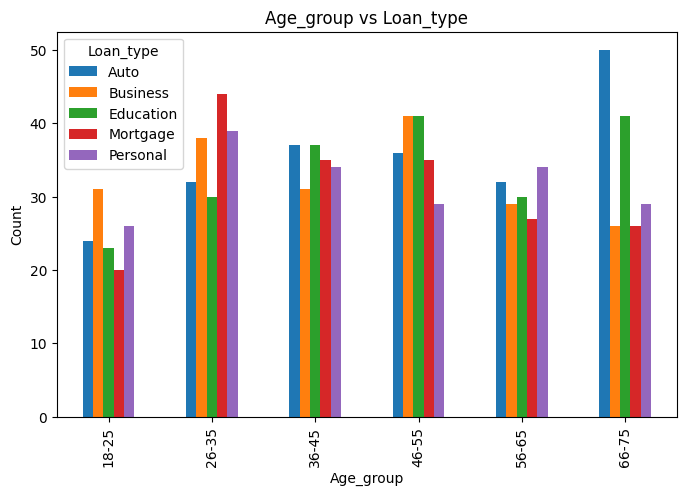

In [31]:
pd.crosstab(df['Age_group'], df['Loan_type']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Age_group")
plt.ylabel("Count")
plt.title("Age_group vs Loan_type")

Text(0.5, 1.0, 'Age_group vs Credit_score_category')

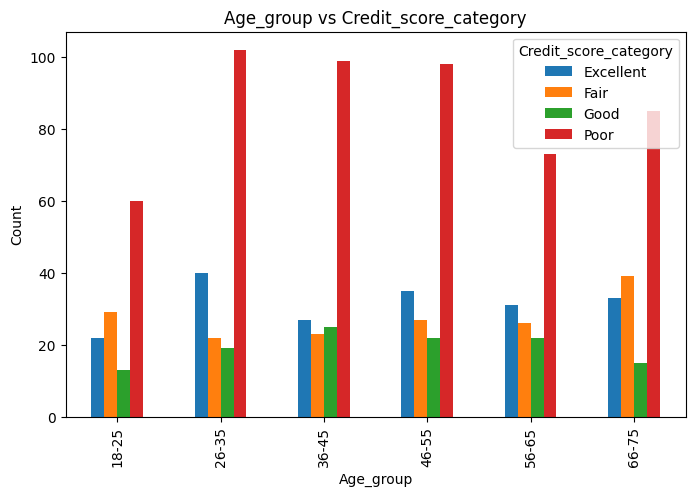

In [32]:
pd.crosstab(df['Age_group'], df['Credit_score_category']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Age_group")
plt.ylabel("Count")
plt.title("Age_group vs Credit_score_category")

Text(0.5, 1.0, 'Repayment_status vs Credit_score_category')

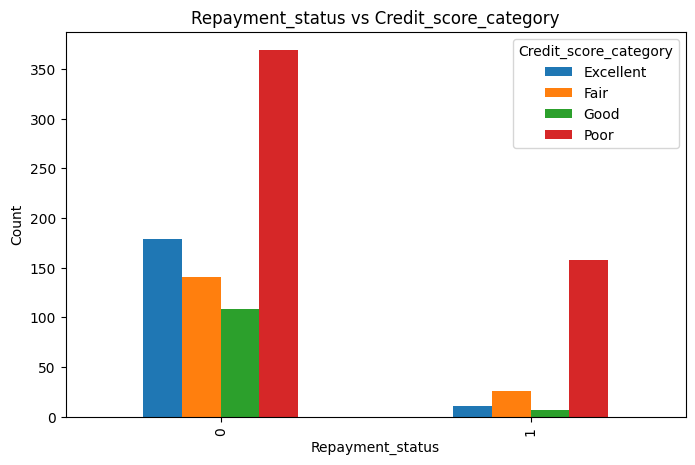

In [33]:
pd.crosstab(df['Repayment_status'],df["Credit_score_category"]).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Repayment_status")
plt.ylabel("Count")
plt.title("Repayment_status vs Credit_score_category")

Default repayment stauts gives out the clear view where the excellent and good grade was low. where as in the no default have good number of excellent, fair and good grades 

C:\Users\sandh\AppData\Local\Temp\ipykernel_53580\2772907148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_2023['Transaction_month'] = yr_2023['Transaction_month'].astype('category')


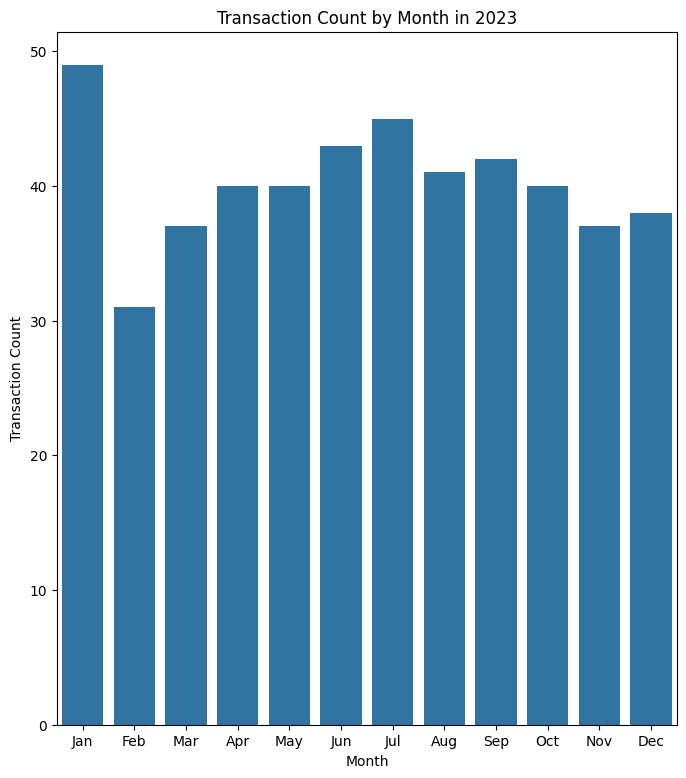

In [34]:
yr_2023=df[df["Transaction_year"]==2023]
month_analysis1 = yr_2023.groupby('Transaction_month').size()
# Ensure 'Transaction_month' is a categorical variable for ordering
yr_2023['Transaction_month'] = yr_2023['Transaction_month'].astype('category')

plt.figure(figsize=(8, 9))
sns.countplot(x='Transaction_month', data=yr_2023, order=range(1, 13))

plt.title("Transaction Count by Month in 2023")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_53580\1858102089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_2024['Transaction_month'] = yr_2024['Transaction_month'].astype('category')


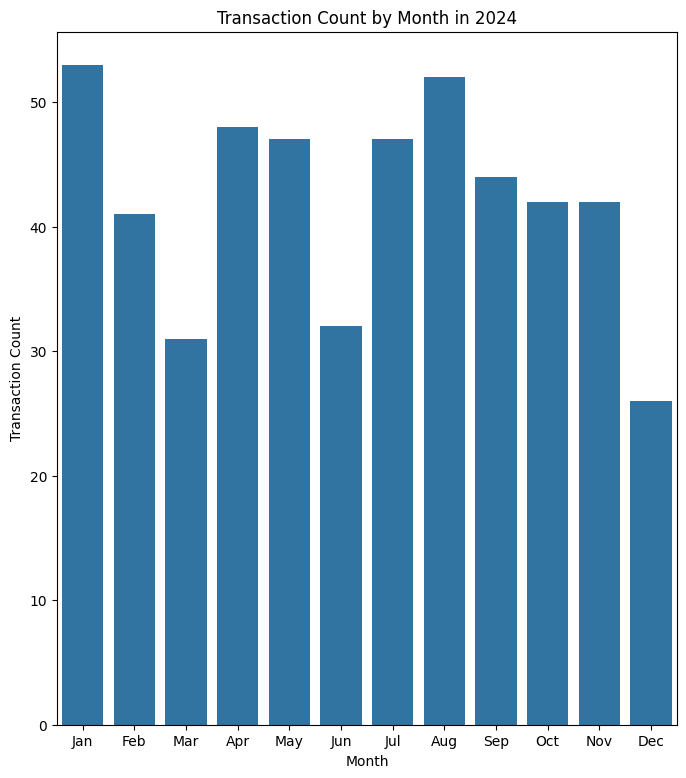

In [35]:
yr_2024=df[df["Transaction_year"]==2024]
month_analysis1 = yr_2024.groupby('Transaction_month').size()
# Ensure 'Transaction_month' is a categorical variable for ordering
yr_2024['Transaction_month'] = yr_2024['Transaction_month'].astype('category')

plt.figure(figsize=(8, 9))
sns.countplot(x='Transaction_month', data=yr_2024, order=range(1, 13))

# Optional: Add labels for better readability
plt.title("Transaction Count by Month in 2024")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

In [36]:
bins = [15000, 35000, 55000, 75000, 95000, 115000, 135000, 155000, 175000, 200000]
labels = ["15000-35000", "35000-55000", "55000-75000", "75000-95000", "95000-115000", 
          "115000-135000", "135000-155000", "155000-175000", "175000-200000"]

df["grouped_income"]=pd.cut(df["Income"],bins=bins,labels=labels,right=True)


In [37]:
df["grouped_income"].value_counts()

grouped_income
175000-200000    148
15000-35000      122
95000-115000     121
55000-75000      116
115000-135000    108
35000-55000      106
75000-95000       99
135000-155000     99
155000-175000     81
Name: count, dtype: int64

Text(0.5, 1.0, 'Income vs Gender')

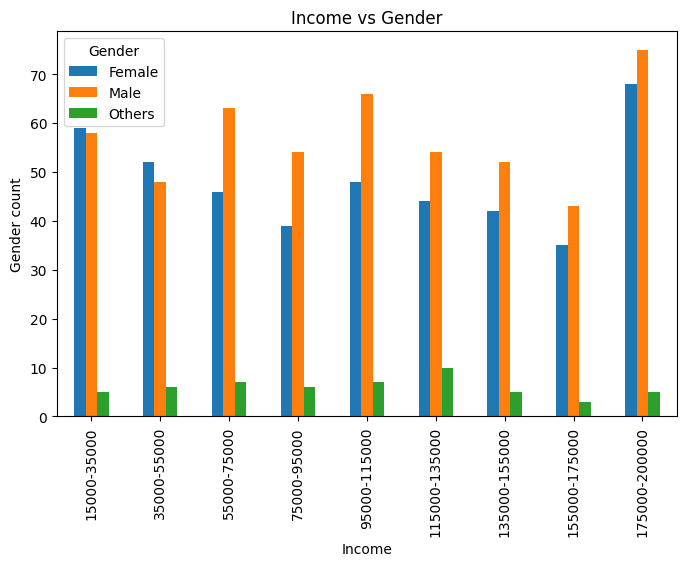

In [38]:
pd.crosstab(df['grouped_income'],df['Gender']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Income")
plt.ylabel("Gender count")
plt.title("Income vs Gender")

15k-55k female propoation is more compared with other genders. from 55k-2L male dominates the propotion over other two genders.

Text(0.5, 1.0, 'Income vs Cibil score')

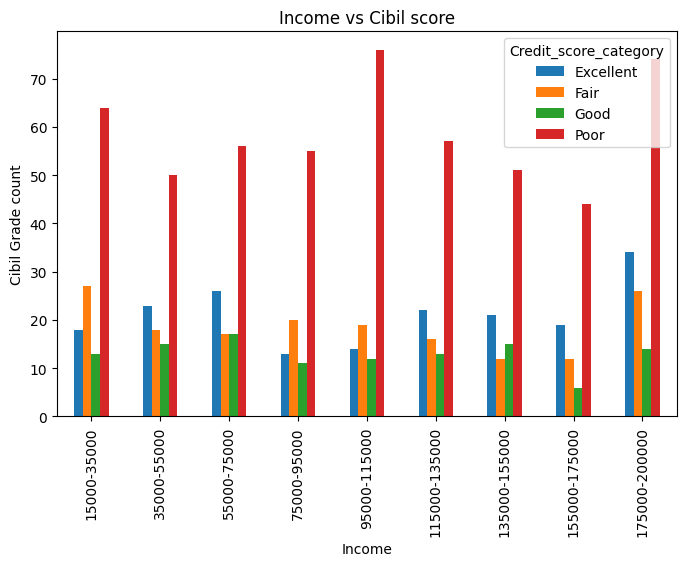

In [39]:
pd.crosstab(df['grouped_income'], df['Credit_score_category']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Income")
plt.ylabel("Cibil Grade count")
plt.title("Income vs Cibil score")

Text(0.5, 1.0, 'Income vs Repayment Stauts')

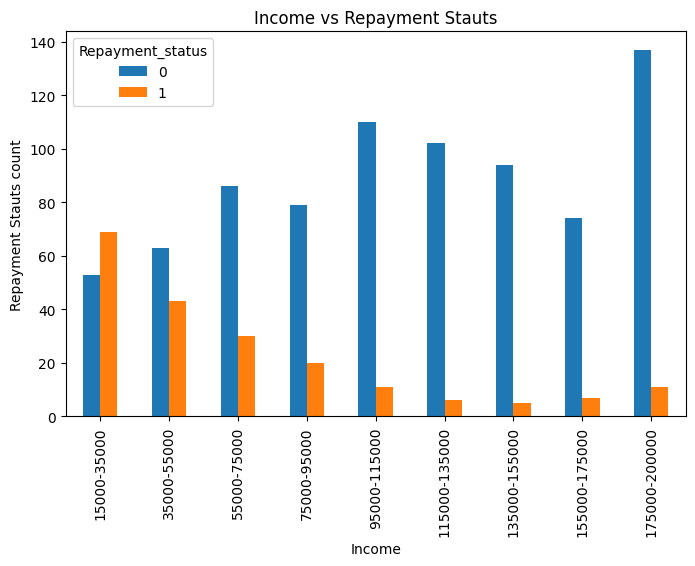

In [40]:
pd.crosstab(df['grouped_income'],df['Repayment_status']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Income")
plt.ylabel("Repayment Stauts count")
plt.title("Income vs Repayment Stauts")

15k-35k default ratio is high where we can see default ratio gradually decreses by increasing the income.

Text(0.5, 1.0, 'Income vs Loan Type')

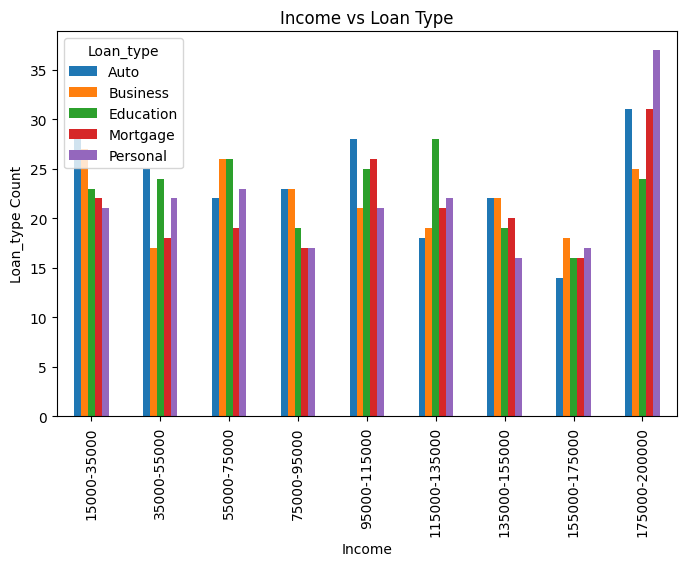

In [41]:
pd.crosstab(df['grouped_income'],df['Loan_type']).plot(kind='bar', figsize=(8, 5))
plt.xlabel("Income")
plt.ylabel("Loan_type Count")
plt.title("Income vs Loan Type")

This above graph shows that loans taken based on the diffent income range

In [42]:
num_col=['Age', 'Income', 'Credit_score', 'Loan_amount', 'Interest_rate',
       'Loan_term', 'Debit_income', 'Transaction_amt', 'Transaction_freq']



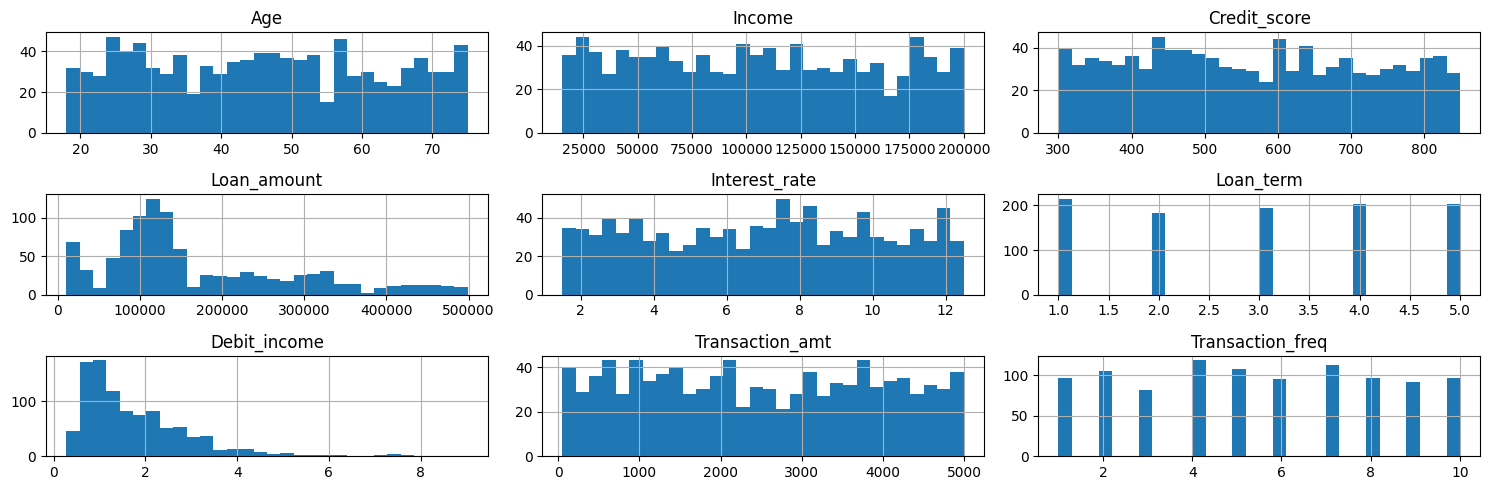

In [43]:
#histplot-distribution of data
df[num_col].hist(figsize=(15,5),bins=30,layout=(3,3))
plt.tight_layout()
plt.show()

The above histplot gives the information of numerical column distribution. Here Other than Loan amount and Debit income all the equally distributed. Debit income alone positively skewed.

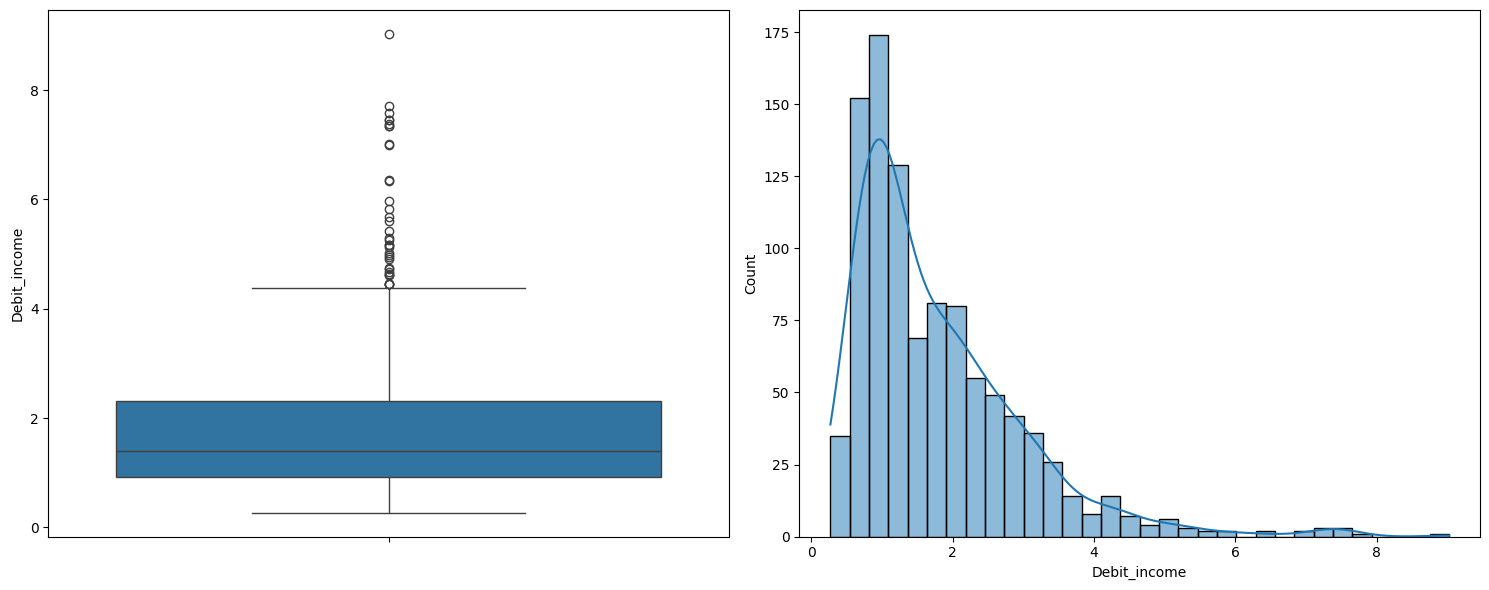

In [44]:
plt.figure(figsize=(15, 6))  


plt.subplot(1,2,1)
sns.boxplot(df["Debit_income"])

plt.subplot(1,2,2)

sns.histplot(df["Debit_income"],kde=True) 

plt.tight_layout()


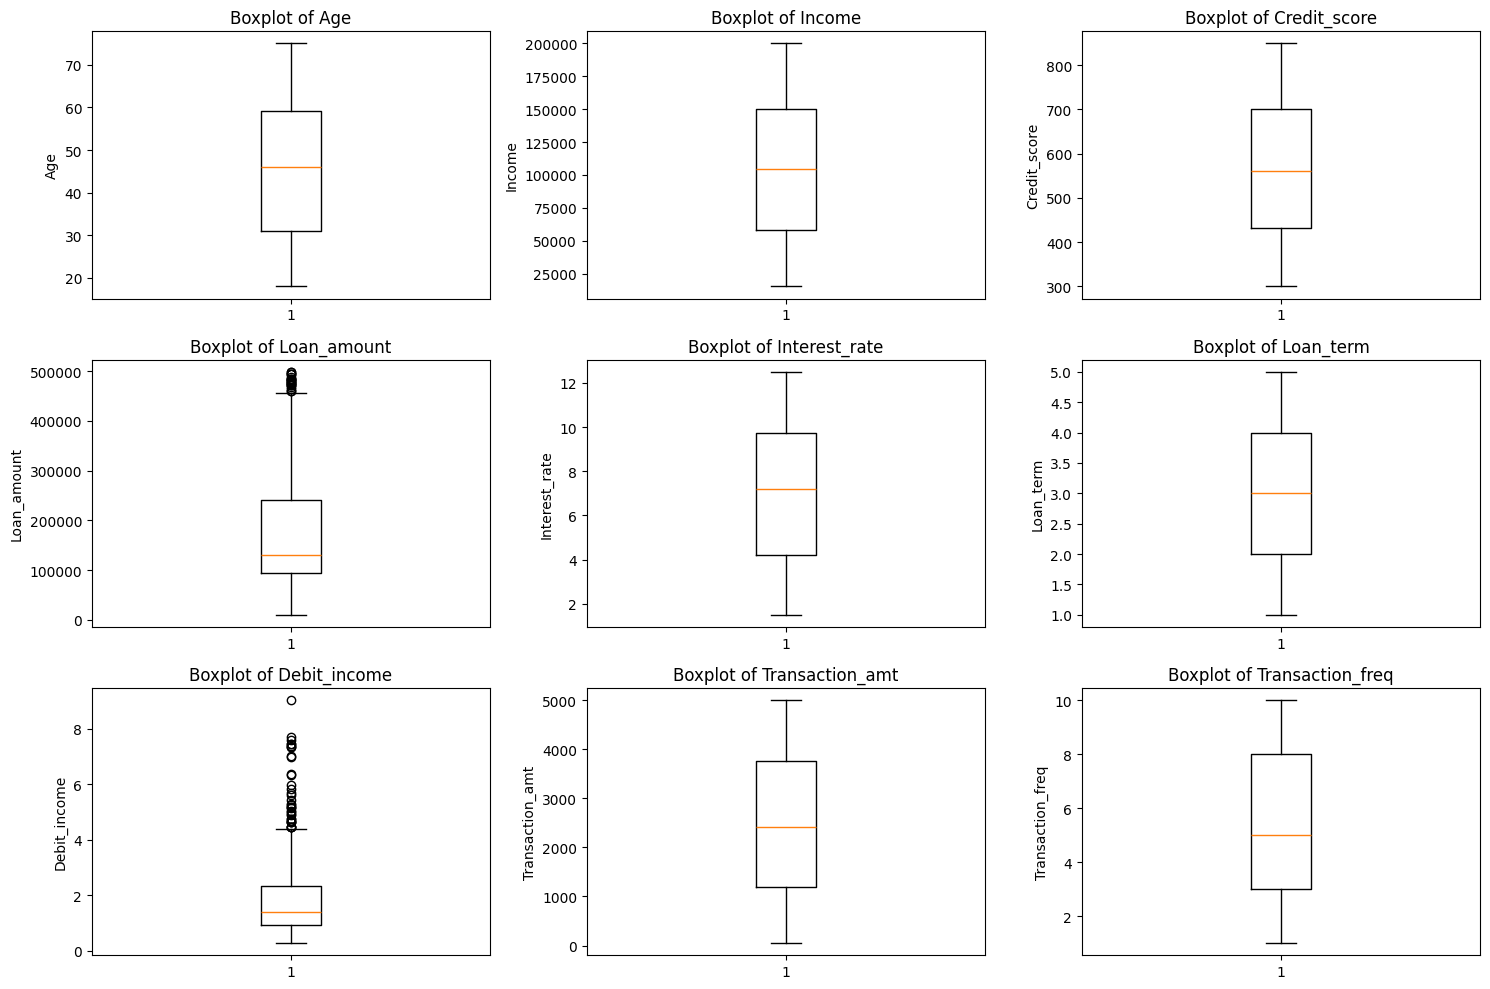

In [45]:
import matplotlib.pyplot as plt

# Assuming num_col contains numeric column names
num_plots = len(num_col)

# Create subplots in a 3x3 layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust nrows/ncols as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

for i, col in enumerate(num_col):
    axes[i].boxplot(df[col])  # Plot boxplot on the respective axis
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

# Hide any unused subplots if the number of columns is less than the grid size
for j in range(len(num_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [46]:
import pandas as pd

def find_skew(df, num_col):
    skew_data = []  # List to store skewness information
    
    for col in num_col:
        skewness = df[col].skew()  # Calculate skewness
        if skewness > 0.5:
            skew_type = "Positively skewed"
        elif skewness < -0.5:
            skew_type = "Negatively skewed"
        else:
            skew_type = "Symmetrically skewed"
        
        # Append the result as a dictionary
        skew_data.append({"Column": col, "Skewness": skewness, "Type": skew_type})
    
    # Convert list of dictionaries into a DataFrame
    return  pd.DataFrame(skew_data)



In [47]:
skew_df = find_skew(df, num_col)
pd.DataFrame(skew_df)

,Column,Skewness,Type
0,Age,0.074170,Symmetrically skewed
1,Income,0.077231,Symmetrically skewed
2,Credit_score,0.085485,Symmetrically skewed
3,Loan_amount,0.986753,Positively skewed
4,Interest_rate,-0.027874,Symmetrically skewed
5,Loan_term,-0.017046,Symmetrically skewed
6,Debit_income,1.853181,Positively skewed
7,Transaction_amt,0.056029,Symmetrically skewed
8,Transaction_freq,0.010242,Symmetrically skewed


Numerical data set have Loan amount and Debit Income postively skewed other are symmetrically skewed

<Axes: xlabel='Loan_amount', ylabel='Count'>

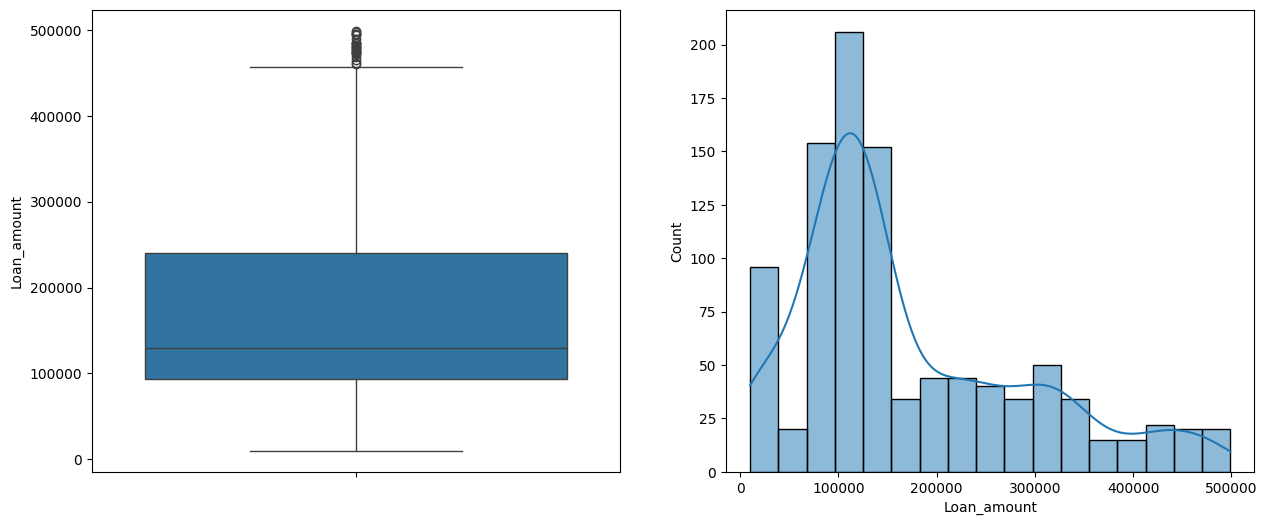

In [48]:
plt.figure(figsize=(15, 6))  


plt.subplot(1,2,1)
sns.boxplot(df["Loan_amount"])

plt.subplot(1,2,2)

sns.histplot(df["Loan_amount"],kde=True) 


So, here both Loan amount and Debit amount is positively skewed. we going to handle the skewness

In [49]:
num_cols=['Age', 'Income', 'Credit_score', 'Loan_amount', 'Interest_rate',
       'Loan_term', 'Debit_income', 'Transaction_amt', 'Transaction_freq',"Repayment_status"]


<Axes: >

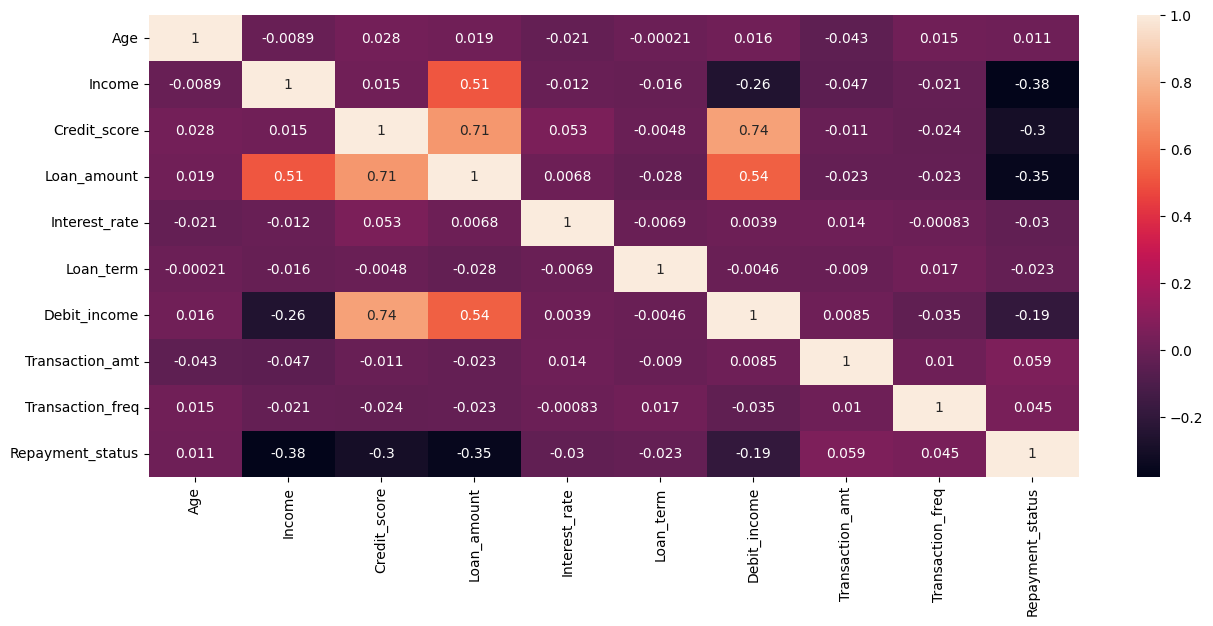

In [50]:
plt.figure(figsize=(15,6))
sns.heatmap(df[num_cols].corr(),annot=True)

In [51]:
import scipy.stats as stats


In [52]:
#skew handling:
df["Debit_income_sqrt"]=np.sqrt(df["Debit_income"])
df["Debit_income_log"]=np.log1p(df["Debit_income"])
df["Box_cox_Debit_income"],_=stats.boxcox(df["Debit_income"])

In [53]:
print("Debit_income_Sqrt",df["Debit_income_sqrt"].skew())


Debit_income_Sqrt 0.8902753967912005


In [54]:
print("Debit_income_log",df["Debit_income_log"].skew())


Debit_income_log 0.6501075102340829


In [55]:
print("Box_cox_Debit_income",df["Box_cox_Debit_income"].skew())


Box_cox_Debit_income 0.007820042031764353


In [56]:
df["Loan_amount_sqrt"]=np.sqrt(df["Loan_amount"])
df["Loan_amount_log"]=np.log1p(df["Loan_amount"])
df["Loan_amount_box_cox"],_=stats.boxcox(df["Loan_amount"])


In [57]:
df["Loan_amount"].skew()


np.float64(0.9867527630320437)

In [58]:
print("Loan_amount_Sqrt",df["Loan_amount_sqrt"].skew())
print("Loan_amount_log",df["Loan_amount_log"].skew())
print("Loan_amount_box_cox",df["Loan_amount_box_cox"].skew())



Loan_amount_Sqrt 0.24236795947435658
Loan_amount_log -0.9636516568007438
Loan_amount_box_cox -0.024085291578713273


In both skew handling, box cox method reducing the skew and making it symmentrical.

<Axes: xlabel='Box_cox_Debit_income', ylabel='Count'>

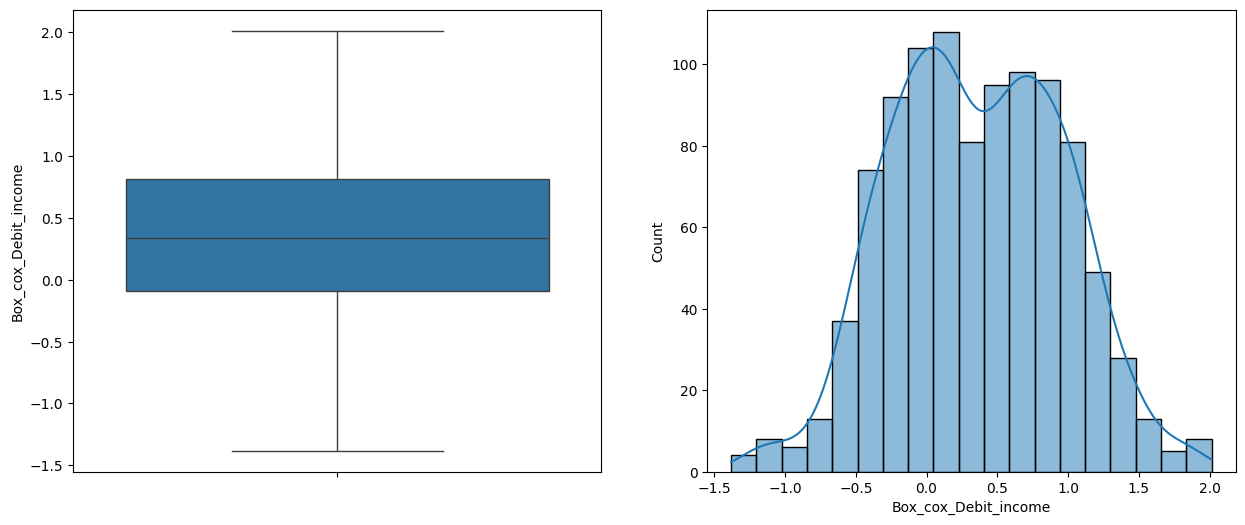

In [59]:
plt.figure(figsize=(15, 6))  


plt.subplot(1,2,1)
sns.boxplot(df["Box_cox_Debit_income"])

plt.subplot(1,2,2)

sns.histplot(df["Box_cox_Debit_income"],kde=True) 


<Axes: xlabel='Loan_amount_box_cox', ylabel='Count'>

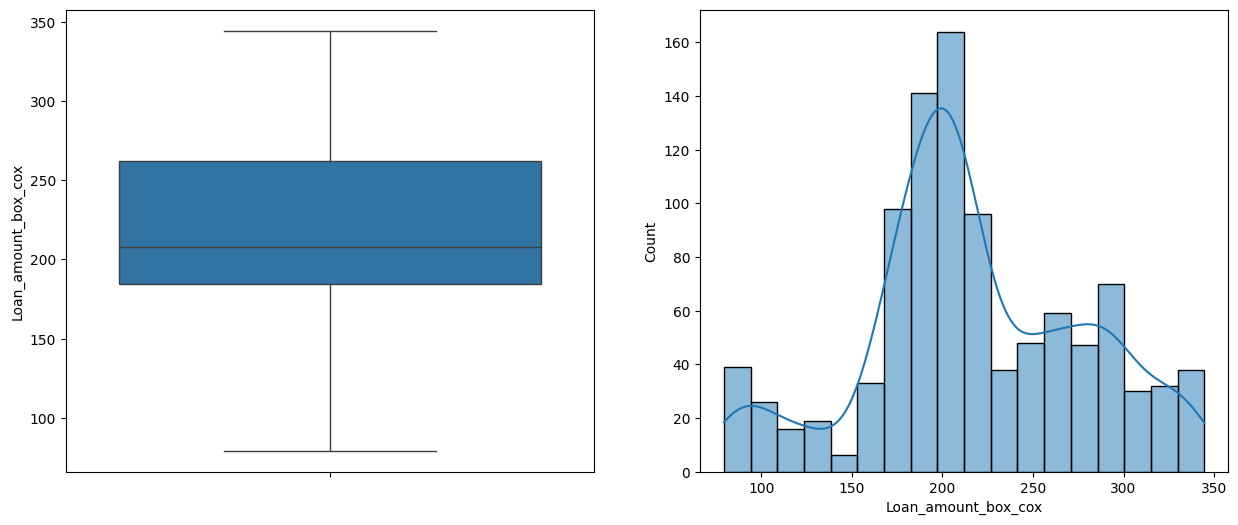

In [60]:
plt.figure(figsize=(15, 6))  


plt.subplot(1,2,1)
sns.boxplot(df["Loan_amount_box_cox"])

plt.subplot(1,2,2)

sns.histplot(df["Loan_amount_box_cox"],kde=True) 


Therefore, outlier handled for above 2 numerical comumns. Now the columns ready for machine learning model.

In [116]:
num_col1=['Age', 'Income', 'Credit_score', "Loan_amount_box_cox", 'Interest_rate',
       'Loan_term', "Box_cox_Debit_income", 'Transaction_amt', 'Transaction_freq']

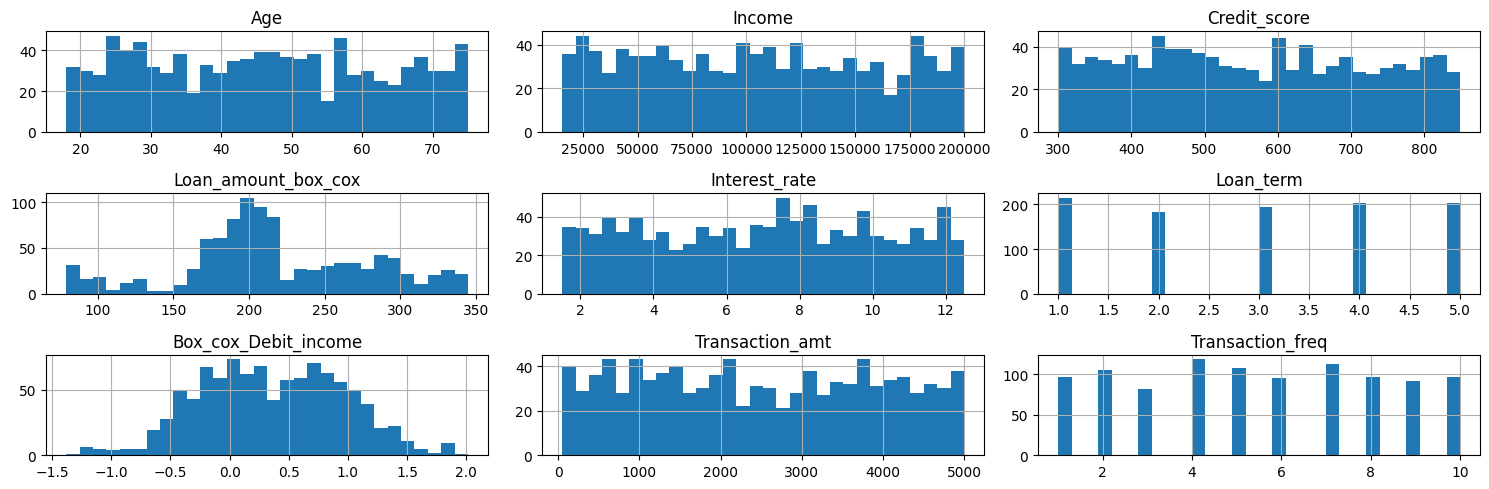

In [117]:
#histplot-distribution of data
df[num_col1].hist(figsize=(15,5),bins=30,layout=(3,3))
plt.tight_layout()
plt.show()

In [61]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Income', 'Credit_score',
       'Credit_score_category', 'Loan_amount', 'Interest_rate', 'Loan_term',
       'Loan_type', 'Repayment_status', 'Debit_income', 'Transaction_id',
       'Transaction_amt', 'Transaction_type', 'Transaction_data',
       'Transaction_month', 'Transaction_year', 'Transaction_freq',
       'Product_id', 'Product_names', 'Interaction_type', 'Interaction_date',
       'Interaction_month', 'Interaction_year', 'Age_group', 'grouped_income',
       'Debit_income_sqrt', 'Debit_income_log', 'Box_cox_Debit_income',
       'Loan_amount_sqrt', 'Loan_amount_log', 'Loan_amount_box_cox'],
      dtype='object')

ENCODING


In [62]:
from sklearn.preprocessing import LabelEncoder


In [63]:
df_col=df.select_dtypes(include=["object","category"])

In [118]:
df[['Gender', 'Credit_score_category', 'Loan_type']]

,Gender,Credit_score_category,Loan_type
0,1,1,2
1,1,1,0
2,1,0,0
3,1,0,0
4,0,1,1
...,...,...,...
995,1,0,0
996,1,3,1
997,1,3,3
998,0,0,3


In [64]:

df_le = ['Gender', 'Credit_score_category', 'Loan_type']

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply label encoding to the specified columns
for col in df_le:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
print(df.head())


  Customer_id  Age  Gender  Income  Credit_score  Credit_score_category  \
0       C0124   66       1  108296           627                      1   
1       C0119   25       1   88437           589                      1   
2        C044   21       1   93447           832                      0   
3       C0148   55       1  138441           845                      0   
4       C0196   22       0  184615           606                      1   

   Loan_amount  Interest_rate  Loan_term  Loan_type  ...  Interaction_month  \
0       225098           1.82          1          2  ...                  6   
1       109731          10.80          5          0  ...                  5   
2       261695          12.24          4          0  ...                  4   
3       368030           5.67          4          0  ...                 12   
4       257577           5.96          1          1  ...                  2   

   Interaction_year Age_group  grouped_income Debit_income_sqrt  \
0      

Train-Test-split

In [65]:
X=df[['Age','Income','Credit_score','Credit_score_category','Loan_amount','Interest_rate','Loan_term','Loan_type','Box_cox_Debit_income']]
Y=df["Repayment_status"]

In [66]:
from sklearn.preprocessing import StandardScaler


In [67]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

In [121]:
X

,Age,Income,Credit_score,Credit_score_category,Loan_amount,Interest_rate,Loan_term,Loan_type,Box_cox_Debit_income
0,66,108296,627,1,225098,1.82,1,2,0.710281
1,25,88437,589,1,109731,10.80,5,0,0.213856
2,21,93447,832,0,261695,12.24,4,0,0.987758
3,55,138441,845,0,368030,5.67,4,0,0.939782
4,22,184615,606,1,257577,5.96,1,1,0.328567
...,...,...,...,...,...,...,...,...,...
995,62,124501,756,0,378734,4.60,3,0,1.063577
996,42,147282,304,3,128694,3.91,1,1,-0.135656
997,42,161293,477,3,120091,2.05,1,3,-0.298547
998,38,184499,768,0,489486,10.24,2,3,0.937928


In [119]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Income', 'Credit_score',
       'Credit_score_category', 'Loan_amount', 'Interest_rate', 'Loan_term',
       'Loan_type', 'Repayment_status', 'Debit_income', 'Transaction_id',
       'Transaction_amt', 'Transaction_type', 'Transaction_data',
       'Transaction_month', 'Transaction_year', 'Transaction_freq',
       'Product_id', 'Product_names', 'Interaction_type', 'Interaction_date',
       'Interaction_month', 'Interaction_year', 'Age_group', 'grouped_income',
       'Debit_income_sqrt', 'Debit_income_log', 'Box_cox_Debit_income',
       'Loan_amount_sqrt', 'Loan_amount_log', 'Loan_amount_box_cox'],
      dtype='object')

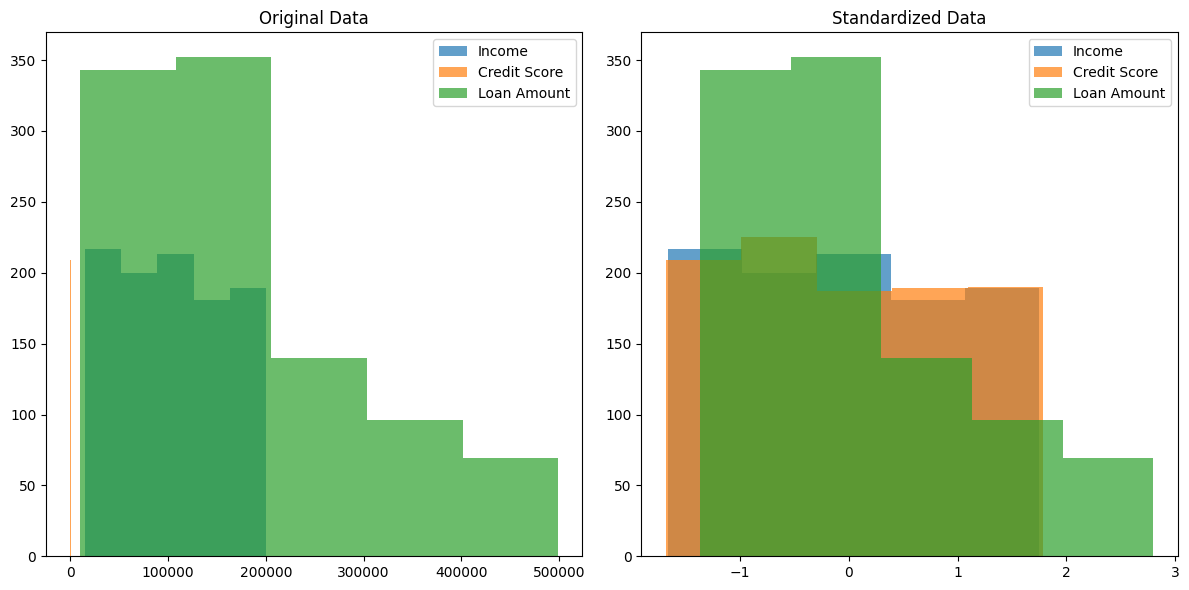

In [124]:
# Plot Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X['Income'], bins=5, alpha=0.7, label='Income')
plt.hist(X['Credit_score'], bins=5, alpha=0.7, label='Credit Score')
plt.hist(X['Loan_amount'], bins=5, alpha=0.7, label='Loan Amount')
plt.title('Original Data')
plt.legend()

# Apply Standard Scaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

# Plot Standardized Data
plt.subplot(1, 2, 2)
plt.hist(standardized_df['Income'], bins=5, alpha=0.7, label='Income')
plt.hist(standardized_df['Credit_score'], bins=5, alpha=0.7, label='Credit Score')
plt.hist(standardized_df['Loan_amount'], bins=5, alpha=0.7, label='Loan Amount')
plt.title('Standardized Data')
plt.legend()

plt.tight_layout()
plt.show()


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(x_scaler,Y,test_size=0.2,random_state=42)


In [70]:
# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (800, 9)
y_train shape: (800,)
X_test shape: (200, 9)
y_test shape: (200,)


In [71]:
from imblearn.over_sampling import SMOTE


In [72]:
Y_train.value_counts()

Repayment_status
0    635
1    165
Name: count, dtype: int64

In [73]:
smote=SMOTE()
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [74]:
Y_train_smote.value_counts()

Repayment_status
0    635
1    635
Name: count, dtype: int64

In [75]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_smote,Y_train_smote)
y_pred_lr=lr.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer


In [77]:
accuracy_lr=accuracy_score(Y_test, y_pred_lr)
precision_scr_lr=precision_score(Y_test, y_pred_lr)
recall_scr_lr=recall_score(Y_test, y_pred_lr)
f1_scr_lr=f1_score(Y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(Y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(Y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(Y_test, y_pred_lr))


Logistic Regression Accuracy: 0.805
Logistic Regression Precision: 0.4838709677419355
Logistic Regression Recall: 0.8108108108108109
Logistic Regression F1-Score: 0.6060606060606061


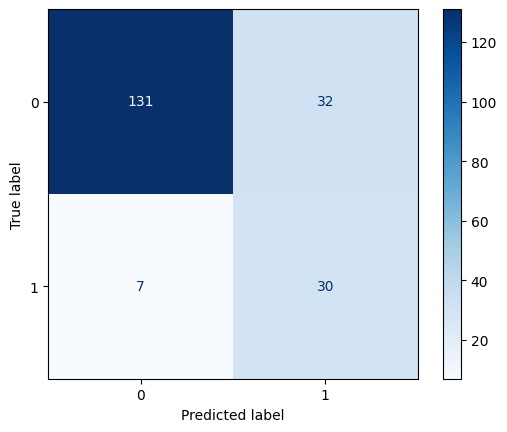

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test are the true labels and y_pred are the predicted labels
y_pred = lr.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()

In [79]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization methods
    'C': [0.01, 0.1, 1, 10, 100],                 # Regularization strength
    'solver': ['liblinear', 'saga'],              # Optimization algorithms
    'max_iter': [100, 200, 500]                   # Maximum number of iterations
}

scoring = make_scorer(f1_score)


In [80]:
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring =scoring)
grid_search.fit(X_train_smote, Y_train_smote)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=2)

In [81]:
print("Best_parameter:",grid_search.best_params_)
print("Best_Score:",grid_search.best_score_)
print("Best_model",grid_search.best_estimator_)

Best_parameter: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best_Score: 0.7778270101803486
Best_model LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='saga')


In [82]:
best_model_lr=grid_search.best_estimator_

In [83]:
Y_pred_lr_best=best_model_lr.predict(X_test)

In [84]:
accuracy_lr_best=accuracy_score(Y_test, Y_pred_lr_best)
precision_scr_lr=precision_score(Y_test, Y_pred_lr_best)
recall_scr_lr=recall_score(Y_test, Y_pred_lr_best)
f1_scr_lr=f1_score(Y_test, Y_pred_lr_best)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_scr_lr)
print("Logistic Regression Recall:", recall_scr_lr)
print("Logistic Regression F1-Score:", f1_scr_lr)

Logistic Regression Accuracy: 0.805
Logistic Regression Precision: 0.4782608695652174
Logistic Regression Recall: 0.8918918918918919
Logistic Regression F1-Score: 0.6226415094339622


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


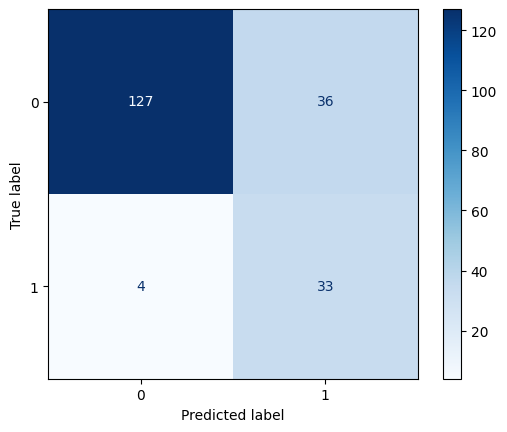

In [86]:



# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_lr_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()

In [87]:
#Random forest classifer:
rf=RandomForestClassifier()
rf.fit(X_train_smote,Y_train_smote)
y_pred_rf=rf.predict(X_test)


In [88]:
accuracy_rf=accuracy_score(Y_test, y_pred_rf)
precision_scr_rf=precision_score(Y_test, y_pred_rf)
recall_scr_rf=recall_score(Y_test, y_pred_rf)
f1_scr_rf=f1_score(Y_test, y_pred_rf)
print("Random forest Accuracy:", accuracy_rf)
print("Random forest Precision:", precision_scr_rf)
print("Random forest Recall:", recall_scr_rf)
print("Random forest F1-Score:", f1_scr_rf)

Random forest Accuracy: 0.865
Random forest Precision: 0.631578947368421
Random forest Recall: 0.6486486486486487
Random forest F1-Score: 0.64


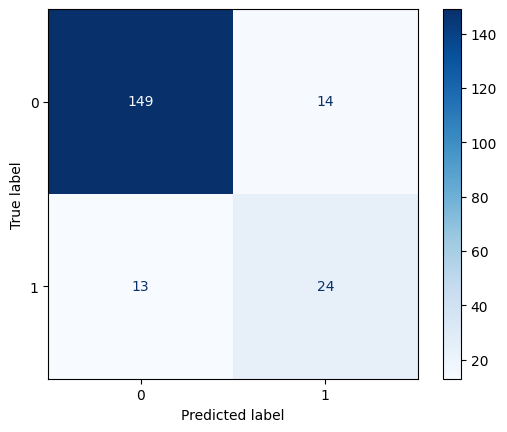

In [89]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()

In [90]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 5,10],
    'max_features': ['sqrt', 'log2'],
 
}


Grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

Grid_search_rf.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=2)

In [91]:
best_model=Grid_search_rf.best_estimator_
print("Best score:",Grid_search_rf.best_score_)
print("Best estimator:",best_model)


Best score: 0.8953731745812904
Best estimator: RandomForestClassifier(max_depth=20)


In [92]:
y_pred_best_rf=best_model.predict(X_test)


In [93]:
print("Random Forest best accuracy score:",accuracy_score(Y_test,y_pred_best_rf))
print("Random Forest best precision score:",precision_score(Y_test,y_pred_best_rf))
print("Random Forest best recall score:",recall_score(Y_test,y_pred_best_rf))
print("Random Forest best f1-score:",f1_score(Y_test,y_pred_best_rf))

Random Forest best accuracy score: 0.875
Random Forest best precision score: 0.65
Random Forest best recall score: 0.7027027027027027
Random Forest best f1-score: 0.6753246753246753


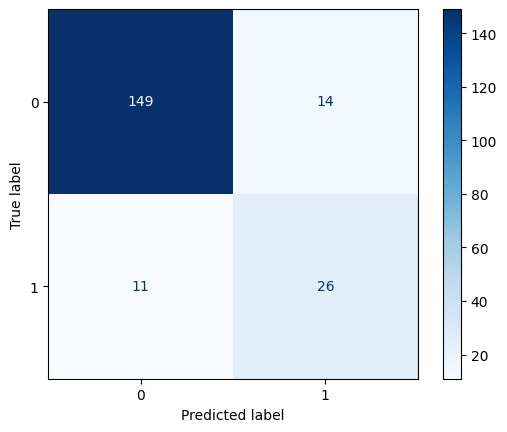

In [94]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_best_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()

In [95]:
#Gradient Boosting classifier
gb=GradientBoostingClassifier()
gb.fit(X_train_smote,Y_train_smote)
y_pred_gb=gb.predict(X_test)

In [96]:
accuracy_best_rf=accuracy_score(Y_test,y_pred_gb)

In [97]:
print("Random Forest best accuracy score:",accuracy_score(Y_test,y_pred_gb))
print("Random Forest best precision score:",precision_score(Y_test,y_pred_gb))
print("Random Forest best recall score:",recall_score(Y_test,y_pred_gb))
print("Random Forest best f1-score:",f1_score(Y_test,y_pred_gb))

Random Forest best accuracy score: 0.89
Random Forest best precision score: 0.7027027027027027
Random Forest best recall score: 0.7027027027027027
Random Forest best f1-score: 0.7027027027027027


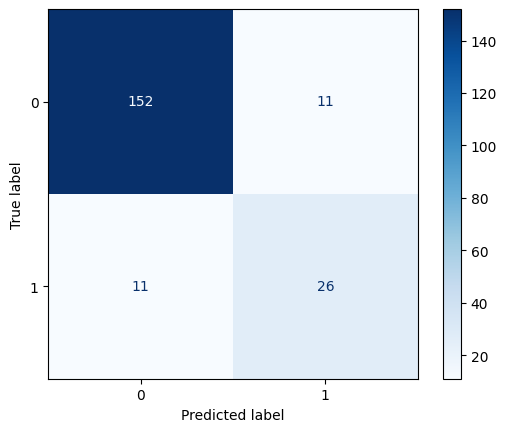

In [98]:
cm = confusion_matrix(Y_test, y_pred_gb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()


In [99]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']}
scoring=make_scorer(f1_score)
grid_search_gb=GridSearchCV(estimator=gb,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring=scoring)
grid_search_gb.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=2)

In [100]:
best_model_gb=grid_search_gb.best_estimator_
print("Best_score:",grid_search_gb.best_score_)
print("Best model:",grid_search_gb.best_estimator_)

Best_score: 0.9129553063522827
Best model: GradientBoostingClassifier(learning_rate=0.05, max_depth=10,
                           max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           subsample=0.8)


In [101]:
Y_pred_best_gb=best_model_gb.predict(X_test)

In [102]:
accuracy_gb_best=accuracy_score(Y_test,Y_pred_best_gb)

In [103]:
print("Random Forest best accuracy score:",accuracy_score(Y_test,Y_pred_best_gb))
print("Random Forest best precision score:",precision_score(Y_test,Y_pred_best_gb))
print("Random Forest best recall score:",recall_score(Y_test,Y_pred_best_gb))
print("Random Forest best f1-score:",f1_score(Y_test,Y_pred_best_gb))

Random Forest best accuracy score: 0.885
Random Forest best precision score: 0.71875
Random Forest best recall score: 0.6216216216216216
Random Forest best f1-score: 0.6666666666666666


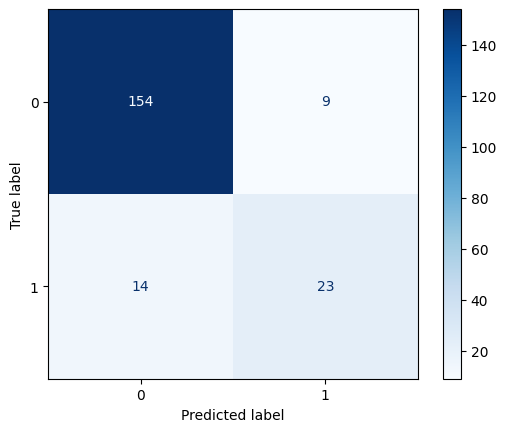

In [104]:
cm = confusion_matrix(Y_test, Y_pred_best_gb)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.show()


In [105]:
import pandas as pd

# Model names and their respective accuracies
Model_name = ["Logistic Regression", "Random Forest Classifier", "Gradient Boosting Classifier"]
Accuracy = [accuracy_lr_best, accuracy_best_rf, accuracy_gb_best]  

# Create a DataFrame
compare_model = pd.DataFrame({"Model": Model_name, "Accuracy": Accuracy})


compare_model

,Model,Accuracy
0,Logistic Regression,0.800
1,Random Forest Classifier,0.890
2,Gradient Boosting Classifier,0.885


89% of accuracy shows that out of all Random forest classifier is the best model.

In [106]:
import pickle

In [107]:
with open("model_rf.pkl","wb") as f:
    pickle.dump(Grid_search_rf, f)
with open("Le.pkl","wb") as f:
    pickle.dump(le, f)
with open("Scaler.pkl","wb") as f:
    pickle.dump(scaler, f)


In [108]:
df["Loan_type"].value_counts()

Loan_type
0    212
2    204
1    198
4    196
3    190
Name: count, dtype: int64

In [109]:
# Example to load and use the model
with open("model_rf.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [110]:
loaded_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=2)

In [111]:
import sklearn
print(sklearn.__version__)

1.6.1


In [112]:
df

,Customer_id,Age,Gender,Income,Credit_score,Credit_score_category,Loan_amount,Interest_rate,Loan_term,Loan_type,...,Interaction_month,Interaction_year,Age_group,grouped_income,Debit_income_sqrt,Debit_income_log,Box_cox_Debit_income,Loan_amount_sqrt,Loan_amount_log,Loan_amount_box_cox
0,C0124,66,1,108296,627,1,225098,1.82,1,2,...,6,2024,66-75,95000-115000,1.441716,1.124457,0.710281,474.444939,12.324296,255.970654
1,C0119,25,1,88437,589,1,109731,10.80,5,0,...,5,2023,18-25,75000-95000,1.113904,0.806825,0.213856,331.256698,11.605796,195.565780
2,C044,21,1,93447,832,0,261695,12.24,4,0,...,4,2024,18-25,75000-95000,1.673459,1.335123,0.987758,511.561336,12.474939,270.803638
3,C0148,55,1,138441,845,0,368030,5.67,4,0,...,12,2024,46-55,135000-155000,1.630457,1.297023,0.939782,606.654762,12.815922,307.596061
4,C0196,22,0,184615,606,1,257577,5.96,1,1,...,2,2023,18-25,175000-200000,1.181191,0.873472,0.328567,507.520443,12.459078,269.202661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0115,62,1,124501,756,0,378734,4.60,3,0,...,8,2023,56-65,115000-135000,1.744138,1.396744,1.063577,615.413682,12.844592,310.906384
996,C072,42,1,147282,304,3,128694,3.91,1,1,...,5,2023,36-45,135000-155000,0.934769,0.627965,-0.135656,358.739460,11.765201,207.615947
997,C067,42,1,161293,477,3,120091,2.05,1,3,...,6,2023,36-45,155000-175000,0.862874,0.556498,-0.298547,346.541484,11.696013,202.298312
998,C016,38,0,184499,768,0,489486,10.24,2,3,...,8,2023,36-45,175000-200000,1.628820,1.295564,0.937928,699.632761,13.101113,342.142377
